# Baseline model

In [121]:
import pandas as pd
from collections import Counter

In [122]:
data=pd.read_csv('train_fNxu4vz.csv')

In [3]:
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [123]:
data.drop(['Loan_ID','Months_Since_Deliquency'],1,inplace=True)

In [124]:
isn=data['Home_Owner'].isnull()
for i in range(len(data)):
    if isn[i]==True:
        data['Home_Owner'][i]='Missing'


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
isn=data['Length_Employed'].isnull()
for i in range(len(data)):
    if isn[i]==True:
        data['Length_Employed'][i]='Missinglength'


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [126]:
isn=data['Annual_Income'].isnull()
data['miss_ann_inc']=isn

In [127]:
from sklearn.impute import SimpleImputer
import numpy as np
si=SimpleImputer(strategy='median')
x=np.array(data['Annual_Income'])
x=x.reshape(-1,1)
data['Annual_Income']=si.fit_transform(x)

In [128]:
for i in range(len(data)):
    data['Loan_Amount_Requested'][i]=(data['Loan_Amount_Requested'][i]).replace(",","")
data['Loan_Amount_Requested']=data['Loan_Amount_Requested'].astype('int')

/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount_Requested  164309 non-null  int64  
 1   Length_Employed        164309 non-null  object 
 2   Home_Owner             164309 non-null  object 
 3   Annual_Income          164309 non-null  float64
 4   Income_Verified        164309 non-null  object 
 5   Purpose_Of_Loan        164309 non-null  object 
 6   Debt_To_Income         164309 non-null  float64
 7   Inquiries_Last_6Mo     164309 non-null  int64  
 8   Number_Open_Accounts   164309 non-null  int64  
 9   Total_Accounts         164309 non-null  int64  
 10  Gender                 164309 non-null  object 
 11  Interest_Rate          164309 non-null  int64  
 12  miss_ann_inc           164309 non-null  bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 15.2+ MB


In [130]:
X=data.drop(['Interest_Rate'],1)
y=data['Interest_Rate']

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [14]:
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
clf = CatBoostClassifier(
    iterations=100,
    random_seed=42,
    learning_rate=0.1,
    depth=3,
    custom_loss='F1'
)
cat_features=['Length_Employed','Home_Owner','Income_Verified','Purpose_Of_Loan','Gender','miss_ann_inc']

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_valid, y_valid),
    verbose=False,
    plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [15]:
clf.best_score_

{'learn': {'F1:class=1': 0.5809525805752933,
  'F1:class=0': 0.20381438654452624,
  'F1:class=2': 0.5648532876418934,
  'MultiClass': 0.9525588006395489},
 'validation': {'F1:class=1': 0.5725236015217697,
  'F1:class=0': 0.19674520281758562,
  'F1:class=2': 0.5616784630940345,
  'MultiClass': 0.9548608710445532}}

In [132]:
test=pd.read_csv('test_fjtUOL8.csv')

In [133]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [134]:
import numpy as np
rev=np.array(test['Loan_ID'])
rev=rev.reshape(-1,1)
rev=pd.DataFrame(rev,columns=['Loan_ID'])


In [135]:
test.drop(['Loan_ID','Months_Since_Deliquency'],1,inplace=True)

In [136]:
isn=test['Home_Owner'].isnull()
for i in range(len(test)):
    if isn[i]==True:
        test['Home_Owner'][i]='Missing'


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [137]:
isn=test['Length_Employed'].isnull()
for i in range(len(test)):
    if isn[i]==True:
        test['Length_Employed'][i]='Missinglength'


/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [138]:
isn=test['Annual_Income'].isnull()
test['miss_ann_inc']=isn

In [139]:
x=np.array(test['Annual_Income'])
x=x.reshape(-1,1)
test['Annual_Income']=si.transform(x)

In [140]:
for i in range(len(test)):
    test['Loan_Amount_Requested'][i]=(test['Loan_Amount_Requested'][i]).replace(",","")
test['Loan_Amount_Requested']=test['Loan_Amount_Requested'].astype('float64')

/home/suryanarayanan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
y_final=clf.predict(test)

In [33]:
y_final=pd.DataFrame(y_final,columns=['Interest_Rate'])

#rev=test['Loan_ID']
#f=pd.DataFrame(y_lr)
f=pd.concat([rev,y_final],axis=1)
f.head()

f.to_csv('bankcatb.csv')


In [25]:
# F1 score with 0.49 with baseline catboost

# EDA

In [26]:
one=data[data['Interest_Rate']==1]
two=data[data['Interest_Rate']==2]
three=data[data['Interest_Rate']==3]

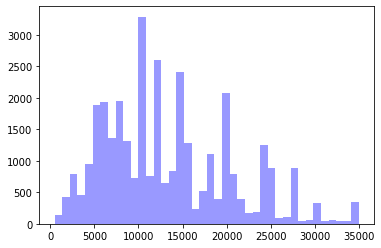

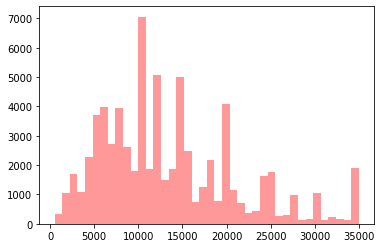

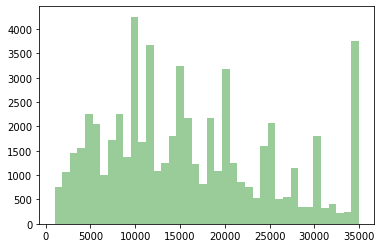

In [37]:
import matplotlib.pyplot as plt
plt.hist(one['Loan_Amount_Requested'],40, facecolor='blue', alpha=0.4)
plt.show()
plt.hist(two['Loan_Amount_Requested'],40, facecolor='red', alpha=0.4)
plt.show()
plt.hist(three['Loan_Amount_Requested'],40, facecolor='green', alpha=0.4)

plt.show()
#Loan >30000 has Interest 3 chances

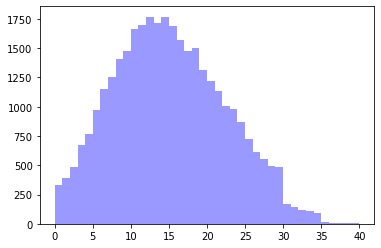

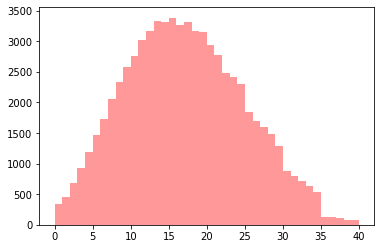

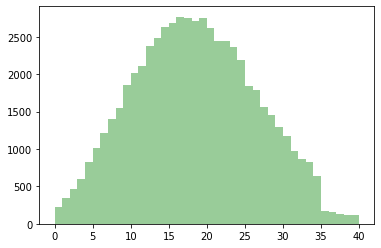

In [28]:
plt.hist(one['Debt_To_Income'],40, facecolor='blue', alpha=0.4)
plt.show()
plt.hist(two['Debt_To_Income'],40, facecolor='red', alpha=0.4)
plt.show()
plt.hist(three['Debt_To_Income'],40, facecolor='green', alpha=0.4)

plt.show()

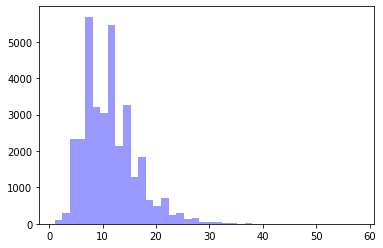

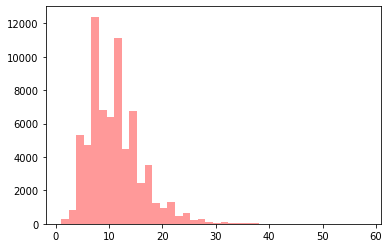

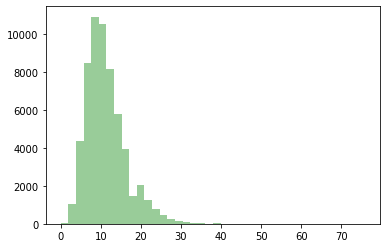

In [29]:
import matplotlib.pyplot as plt
plt.hist(one['Number_Open_Accounts'],40, facecolor='blue', alpha=0.4)
plt.show()
plt.hist(two['Number_Open_Accounts'],40, facecolor='red', alpha=0.4)
plt.show()
plt.hist(three['Number_Open_Accounts'],40, facecolor='green', alpha=0.4)

plt.show()

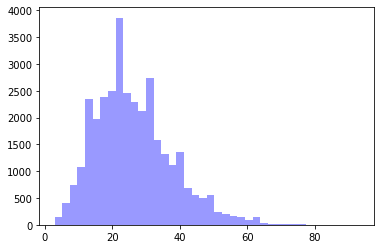

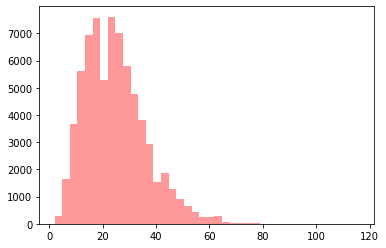

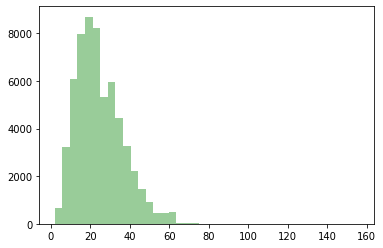

In [30]:
import matplotlib.pyplot as plt
plt.hist(one['Total_Accounts'],40, facecolor='blue', alpha=0.4)
plt.show()
plt.hist(two['Total_Accounts'],40, facecolor='red', alpha=0.4)
plt.show()
plt.hist(three['Total_Accounts'],40, facecolor='green', alpha=0.4)

plt.show()

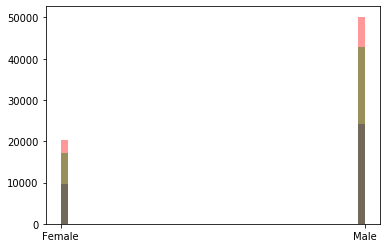

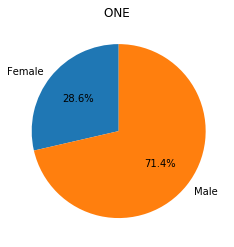

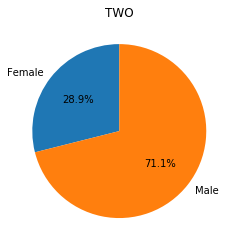

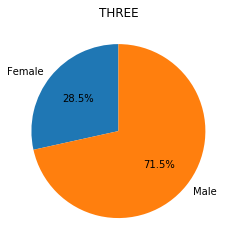

In [31]:
col='Gender'
plt.hist(one[col],40, facecolor='blue', alpha=0.4)
plt.hist(two[col],40, facecolor='red', alpha=0.4)
plt.hist(three[col],40, facecolor='green', alpha=0.4)

plt.show()
counter=Counter(one[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("ONE ")
plt.show()
counter=Counter(two[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("TWO")
plt.show()
counter=Counter(three[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("THREE")
plt.show()



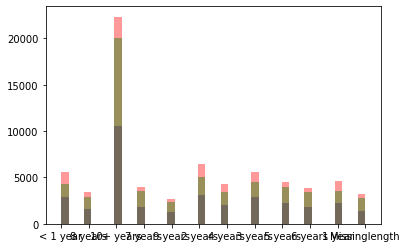

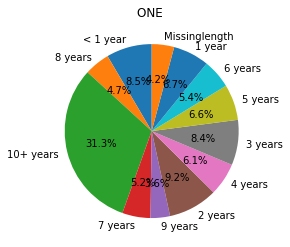

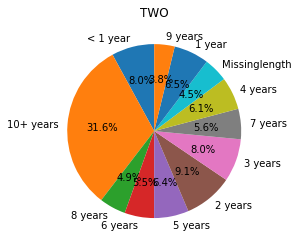

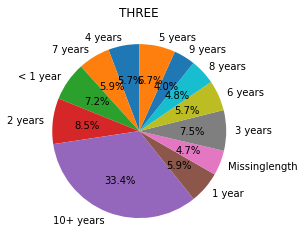

In [32]:
col='Length_Employed'
plt.hist(one[col],40, facecolor='blue', alpha=0.4)
plt.hist(two[col],40, facecolor='red', alpha=0.4)
plt.hist(three[col],40, facecolor='green', alpha=0.4)

plt.show()
counter=Counter(one[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("ONE ")
plt.show()
counter=Counter(two[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("TWO")
plt.show()
counter=Counter(three[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("THREE")
plt.show()


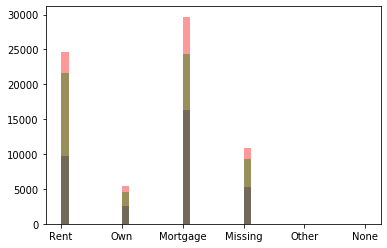

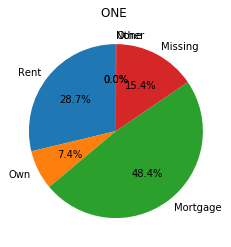

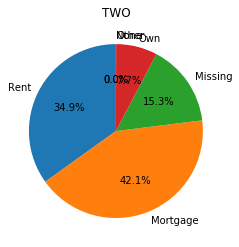

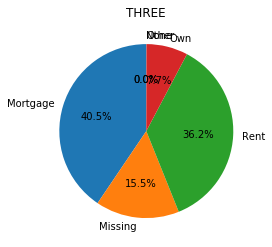

In [33]:
col='Home_Owner'
plt.hist(one[col],40, facecolor='blue', alpha=0.4)
plt.hist(two[col],40, facecolor='red', alpha=0.4)
plt.hist(three[col],40, facecolor='green', alpha=0.4)

plt.show()
counter=Counter(one[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("ONE ")
plt.show()
counter=Counter(two[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("TWO")
plt.show()
counter=Counter(three[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("THREE")
plt.show()



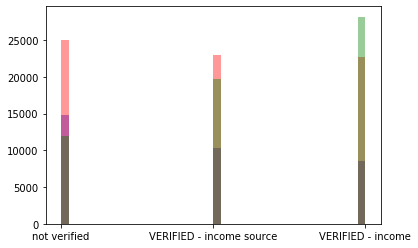

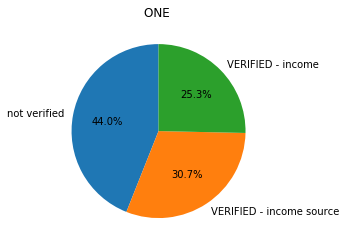

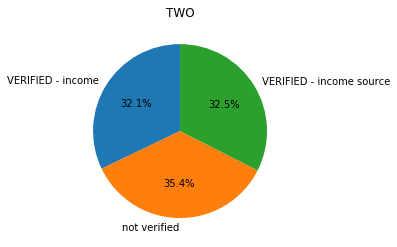

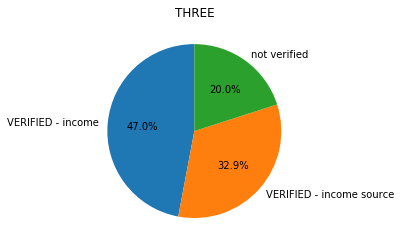

In [34]:
col='Income_Verified'
plt.hist(one[col],40, facecolor='blue', alpha=0.4)
plt.hist(two[col],40, facecolor='red', alpha=0.4)
plt.hist(three[col],40, facecolor='green', alpha=0.4)

plt.show()
counter=Counter(one[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("ONE ")
plt.show()
counter=Counter(two[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("TWO")
plt.show()
counter=Counter(three[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("THREE")
plt.show()

#Income-verified has Interest rate 3

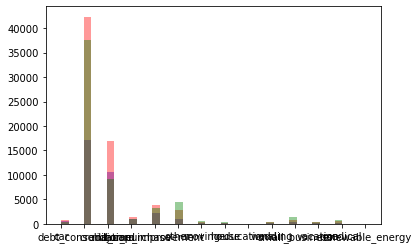

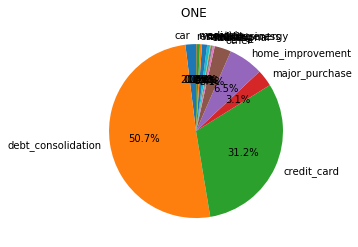

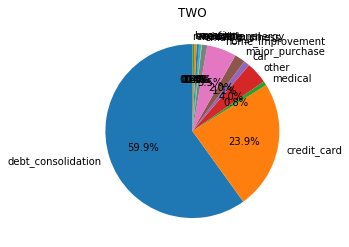

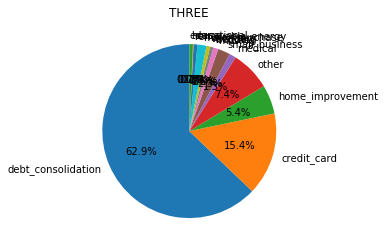

In [35]:
col='Purpose_Of_Loan'
plt.hist(one[col],40, facecolor='blue', alpha=0.4)
plt.hist(two[col],40, facecolor='red', alpha=0.4)
plt.hist(three[col],40, facecolor='green', alpha=0.4)

plt.show()
counter=Counter(one[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("ONE ")
plt.show()
counter=Counter(two[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("TWO")
plt.show()
counter=Counter(three[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("THREE")
plt.show()



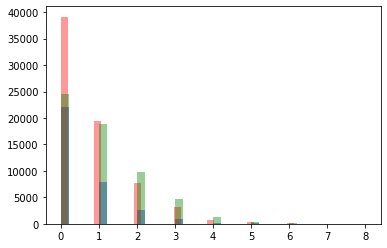

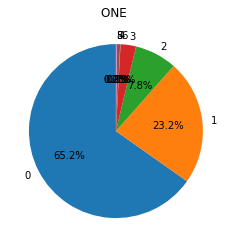

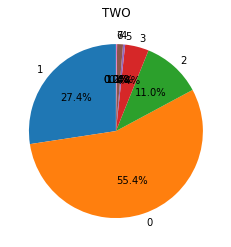

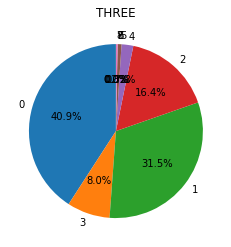

In [36]:
col='Inquiries_Last_6Mo'
plt.hist(one[col],40, facecolor='blue', alpha=0.4)
plt.hist(two[col],40, facecolor='red', alpha=0.4)
plt.hist(three[col],40, facecolor='green', alpha=0.4)

plt.show()
counter=Counter(one[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("ONE ")
plt.show()
counter=Counter(two[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("TWO")
plt.show()
counter=Counter(three[col])
labels =[]
count=[]
for label in counter:
    labels.append(label)
    count.append(counter[label])
plt.pie(count, labels= labels, startangle=90, autopct='%.1f%%',radius=1)
plt.title("THREE")
plt.show()

#0 has interest rate 2

# Feature Creations

In [141]:
data['debt']=data['Debt_To_Income']*data['Annual_Income']
test['debt']=test['Debt_To_Income']*test['Annual_Income']

In [142]:
data['closedacc']=data['Total_Accounts']-data['Number_Open_Accounts']
test['closedacc']=test['Total_Accounts']-test['Number_Open_Accounts']


In [143]:
data['total_amount']=data['debt']+data['Loan_Amount_Requested']
test['total_amount']=test['debt']+test['Loan_Amount_Requested']

In [144]:
data['amobyinc']=data['total_amount']/data['Annual_Income']
test['amobyinc']=test['total_amount']/test['Annual_Income']

In [145]:
data

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,miss_ann_inc,debt,closedacc,total_amount,amobyinc
0,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1,False,1249160.000,5,1256160.000,18.472941
1,30000,4 years,Mortgage,63000.0,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3,True,940590.000,12,970590.000,15.406190
2,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3,False,1199994.432,4,1224719.432,16.207196
3,16000,< 1 year,Missing,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3,False,805334.400,6,821334.400,14.624900
4,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1,False,2128320.000,11,2145320.000,22.347083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,20725,10+ years,Rent,63000.0,VERIFIED - income source,credit_card,13.56,0,13,16,Male,2,True,854280.000,3,875005.000,13.888968
164305,6000,8 years,Own,63000.0,VERIFIED - income source,small_business,9.12,0,13,30,Male,2,True,574560.000,17,580560.000,9.215238
164306,20250,10+ years,Mortgage,63000.0,VERIFIED - income,credit_card,18.17,1,17,30,Male,1,True,1144710.000,13,1164960.000,18.491429
164307,10000,4 years,Rent,63000.0,not verified,major_purchase,18.75,1,16,62,Female,3,True,1181250.000,46,1191250.000,18.908730


In [146]:
from sklearn.preprocessing import OneHotEncoder
oc=OneHotEncoder()
cat_features=['Length_Employed','Home_Owner','Income_Verified','Purpose_Of_Loan','Gender','miss_ann_inc']
onehotcat=oc.fit_transform(data[cat_features])

In [147]:
onehotcat=onehotcat.toarray()

In [148]:
data.drop(cat_features,1,inplace=True)

In [149]:
onehotcat=pd.DataFrame(onehotcat)
data=pd.concat([onehotcat,data],1)

In [150]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate,debt,closedacc,total_amount,amobyinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,68000.0,18.37,0,9,14,1,1249160.000,5,1256160.000,18.472941
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,63000.0,14.93,0,12,24,3,940590.000,12,970590.000,15.406190
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,75566.4,15.88,0,12,16,3,1199994.432,4,1224719.432,16.207196
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56160.0,14.34,3,16,22,3,805334.400,6,821334.400,14.624900
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,96000.0,22.17,1,19,30,1,2128320.000,11,2145320.000,22.347083


In [151]:
X=data.drop(['Interest_Rate'],1)
y=data['Interest_Rate']

In [152]:
from collections import Counter
Counter(y)

Counter({1: 33806, 3: 59923, 2: 70580})

In [153]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [154]:
from collections import Counter
Counter(y)

Counter({1: 70580, 3: 70580, 2: 70580})

In [155]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [63]:
# LGBM

In [64]:
from lightgbm import LGBMClassifier
m = LGBMClassifier(random_state=1,n_estimators=400,learning_rate=0.05,num_leaves=50,objective='softmax')

In [65]:
m.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=50, objective='softmax',
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [66]:
y_pred=m.predict(X_valid)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.60      0.68     14242
           2       0.49      0.63      0.56     13947
           3       0.60      0.57      0.59     14159

    accuracy                           0.60     42348
   macro avg       0.62      0.60      0.61     42348
weighted avg       0.63      0.60      0.61     42348



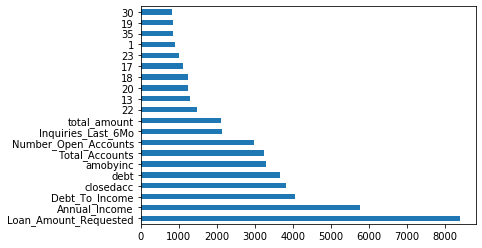

In [68]:
feat_importances = pd.Series(m.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [69]:
# DTC

In [70]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()

In [71]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
y_pred=DTC.predict(X_valid)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           1       0.59      0.59      0.59     14242
           2       0.43      0.44      0.44     13947
           3       0.48      0.47      0.47     14159

    accuracy                           0.50     42348
   macro avg       0.50      0.50      0.50     42348
weighted avg       0.50      0.50      0.50     42348



In [73]:
# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
g=RandomForestClassifier()

In [75]:
g.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_pred=g.predict(X_valid)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.63      0.68     14242
           2       0.48      0.58      0.53     13947
           3       0.58      0.55      0.56     14159

    accuracy                           0.59     42348
   macro avg       0.60      0.59      0.59     42348
weighted avg       0.60      0.59      0.59     42348



In [77]:
# Adaboost


In [78]:
from sklearn.ensemble import AdaBoostClassifier
atc=AdaBoostClassifier(n_estimators=100,learning_rate=1)
atc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [79]:
y_pred=atc.predict(X_valid)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.63      0.66     14242
           2       0.49      0.55      0.52     13947
           3       0.57      0.56      0.56     14159

    accuracy                           0.58     42348
   macro avg       0.59      0.58      0.58     42348
weighted avg       0.59      0.58      0.58     42348



In [80]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
y_pred=model.predict(X_valid)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           1       0.77      0.57      0.66     14242
           2       0.49      0.64      0.55     13947
           3       0.58      0.55      0.56     14159

    accuracy                           0.59     42348
   macro avg       0.61      0.59      0.59     42348
weighted avg       0.61      0.59      0.59     42348



In [156]:
test

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,miss_ann_inc,debt,closedacc,total_amount,amobyinc
0,27500.0,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,10,37,Male,False,1660230.0,27,1687730.0,13.083178
1,26000.0,10+ years,Missing,110000.0,not verified,credit_card,11.37,0,6,23,Male,False,1250700.0,17,1276700.0,11.606364
2,6075.0,< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,5,20,Male,False,512250.0,15,518325.0,6.911000
3,12000.0,10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,6,8,Male,False,566480.0,2,578480.0,7.924384
4,35000.0,< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,9,21,Male,False,1500720.0,12,1535720.0,9.844359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,15000.0,9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,13,57,Male,False,978000.0,44,993000.0,8.275000
109537,9600.0,10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,9,34,Male,False,1135000.0,25,1144600.0,9.156800
109538,2000.0,5 years,Rent,37850.0,not verified,credit_card,11.60,0,10,11,Male,False,439060.0,1,441060.0,11.652840
109539,2125.0,6 years,Rent,30000.0,not verified,other,24.88,0,5,6,Male,False,746400.0,1,748525.0,24.950833


In [157]:
onehotcatest=oc.transform(test[cat_features])

In [158]:
onehotcatest=onehotcatest.toarray()

In [159]:
test.drop(cat_features,1,inplace=True)

In [160]:
onehotcat=pd.DataFrame(onehotcatest)
test=pd.concat([onehotcat,test],1)

In [161]:
test

,0,1,2,3,4,5,6,7,8,9,...,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,debt,closedacc,total_amount,amobyinc
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27500.0,129000.0,12.87,0,10,37,1660230.0,27,1687730.0,13.083178
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26000.0,110000.0,11.37,0,6,23,1250700.0,17,1276700.0,11.606364
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6075.0,75000.0,6.83,2,5,20,512250.0,15,518325.0,6.911000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12000.0,73000.0,7.76,0,6,8,566480.0,2,578480.0,7.924384
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35000.0,156000.0,9.62,0,9,21,1500720.0,12,1535720.0,9.844359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,15000.0,120000.0,8.15,2,13,57,978000.0,44,993000.0,8.275000
109537,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9600.0,125000.0,9.08,1,9,34,1135000.0,25,1144600.0,9.156800
109538,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2000.0,37850.0,11.60,0,10,11,439060.0,1,441060.0,11.652840
109539,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2125.0,30000.0,24.88,0,5,6,746400.0,1,748525.0,24.950833


In [162]:
# Stacking

In [101]:
from vecstack import stacking 

In [163]:
numcols=['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Number_Open_Accounts','Total_Accounts','debt','closedacc','total_amount','amobyinc']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[numcols]=sc.fit_transform(data[numcols])
test[numcols]=sc.transform(test[numcols])

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
m = LGBMClassifier(random_state=1,n_estimators=400,learning_rate=0.05,num_leaves=50,objective='softmax')
rf=RandomForestClassifier()
log=LogisticRegression()
model = XGBClassifier()

# Initialize 1-st level models.
models = [rf, m,log,atc,model]
# Compute stacking features
S_train, S_test = stacking(models, X, y, test,regression=False,metric =None, n_folds = 2,shuffle = True, random_state = 24, verbose = 2)


task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [RandomForestClassifier]
    fold  0:  [0.58026825]
    fold  1:  [0.57961651]
    ----
    MEAN:     [0.57994238] + [0.00032587]
    FULL:     [0.57994238]

model  1:     [LGBMClassifier]
    fold  0:  [0.60010390]
    fold  1:  [0.59963162]
    ----
    MEAN:     [0.59986776] + [0.00023614]
    FULL:     [0.59986776]

model  2:     [LogisticRegression]
    fold  0:  [0.41418721]
    fold  1:  [0.41287428]
    ----
    MEAN:     [0.41353075] + [0.00065647]
    FULL:     [0.41353075]

model  3:     [AdaBoostClassifier]
    fold  0:  [0.57876641]
    fold  1:  [0.58185511]
    ----
    MEAN:     [0.58031076] + [0.00154435]
    FULL:     [0.58031076]

model  4:     [XGBClassifier]
    fold  0:  [0.58771134]
    fold  1:  [0.58944932]
    ----
    MEAN:     [0.58858033] + [0.00086899]
    FULL:     [0.58858033]



In [165]:
# Blender - Catboost
clf.fit(S_train,y)

0:	learn: 1.0590846	total: 62.5ms	remaining: 6.19s
1:	learn: 1.0283777	total: 136ms	remaining: 6.64s
2:	learn: 1.0047564	total: 230ms	remaining: 7.44s
3:	learn: 0.9845745	total: 335ms	remaining: 8.03s
4:	learn: 0.9678421	total: 432ms	remaining: 8.21s
5:	learn: 0.9543772	total: 529ms	remaining: 8.29s
6:	learn: 0.9432950	total: 633ms	remaining: 8.41s
7:	learn: 0.9340075	total: 733ms	remaining: 8.43s
8:	learn: 0.9261144	total: 812ms	remaining: 8.21s
9:	learn: 0.9189310	total: 905ms	remaining: 8.15s
10:	learn: 0.9132824	total: 984ms	remaining: 7.96s
11:	learn: 0.9087565	total: 1.06s	remaining: 7.81s
12:	learn: 0.9046123	total: 1.15s	remaining: 7.7s
13:	learn: 0.9008037	total: 1.23s	remaining: 7.58s
14:	learn: 0.8976562	total: 1.31s	remaining: 7.45s
15:	learn: 0.8949196	total: 1.4s	remaining: 7.33s
16:	learn: 0.8925892	total: 1.48s	remaining: 7.23s
17:	learn: 0.8907654	total: 1.56s	remaining: 7.12s
18:	learn: 0.8891056	total: 1.65s	remaining: 7.03s
19:	learn: 0.8877591	total: 1.73s	remainin

In [166]:
y_p=clf.predict(S_test)

In [ ]:
y_final=pd.DataFrame(y_p,columns=['Interest_Rate'])

#rev=test['Loan_ID']
#f=pd.DataFrame(y_lr)
f=pd.concat([rev,y_final],axis=1)
f.head()

f.to_csv('bankstack.csv')
